# Ejercicios de Hipotesis Testing 

# Ejercicio 1:

Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from scipy.stats import shapiro

Descargamos el dataset y estudiamos sus características:

In [2]:
df_uefa = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding='latin-1')
df_uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


# Ánalisis Exploratorio del Dataframe:

• Tamaño delDataframe                                                                                                                                 
• Información del Dataframe                                                                                                                           
• Recuento de valores nulos                                                                                                                           
• Detectar valores faltantes                                                                                                                       
• Información de atributos                                                                                                                            
• Valores únicos

In [3]:
# Tamaño delDataframe:
df_uefa.shape

(98, 21)

El Dataframe consta de 98 observaciones.

In [4]:
# Información del Dataframe:
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
# Calcular el número de valores nulos pertenecientes a cada columna:
df_uefa.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

No existen valores nulos en ningún atributo.

In [6]:
# Detectar valores faltantes:
df_uefa.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

# Información de los Atributos:

1. Rk: Clasificación                                                                                                                  
2. Squad:   Equipo
3. Country:    País
4. LgRk:     Ronda final alcanzada
5. MP:    DELANTERO / MEDIAPUNTA 
6. W:   Win
7. D:   Defensor Derecho
8. L:   Pérdida
9. GF:    Goles a favor
10. GA:   Metas en contra
11. GD:     Diferencia de goles
12. Pts:   Puntos
13. Pts/G:   Puntos por partido
14. xG:   Goles Esperados
15. xGA:   Goles esperados permitidos
16. xGD:    Diferencia de goles esperados
17. xGD/90:  Diferencia de goles esperados en 90 minutos 
18. Last 5:    Últimos cinco
19. Attendance:   Asistencia
20. Top Team Scorer:   Máximo goleador
21. Goalkeeper:   Portero

In [7]:
# Valores únicos del atributo 'Country', (equipos que participan en la competición):
df_uefa['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

<AxesSubplot: xlabel='Country', ylabel='count'>

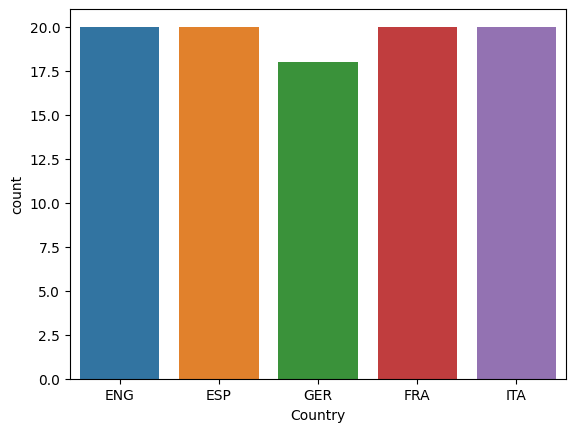

In [8]:
# Contando el número de valores pertenecientes a cada país:
df_uefa['Country'].value_counts()

sns.countplot(x='Country', data=df_uefa)

Como podemos ver, el dataframe matiene un equilibrio.

# Estadísticas Descriptivas:

In [9]:
# Resumen de la distribución de las variables numéricas:
df_uefa.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


# Visualización de Datos:

array([[<AxesSubplot: title={'center': 'Rk'}>,
        <AxesSubplot: title={'center': 'LgRk'}>,
        <AxesSubplot: title={'center': 'MP'}>,
        <AxesSubplot: title={'center': 'W'}>],
       [<AxesSubplot: title={'center': 'D'}>,
        <AxesSubplot: title={'center': 'L'}>,
        <AxesSubplot: title={'center': 'GF'}>,
        <AxesSubplot: title={'center': 'GA'}>],
       [<AxesSubplot: title={'center': 'GD'}>,
        <AxesSubplot: title={'center': 'Pts'}>,
        <AxesSubplot: title={'center': 'Pts/G'}>,
        <AxesSubplot: title={'center': 'xG'}>],
       [<AxesSubplot: title={'center': 'xGA'}>,
        <AxesSubplot: title={'center': 'xGD'}>,
        <AxesSubplot: title={'center': 'xGD/90'}>,
        <AxesSubplot: title={'center': 'Attendance'}>]], dtype=object)

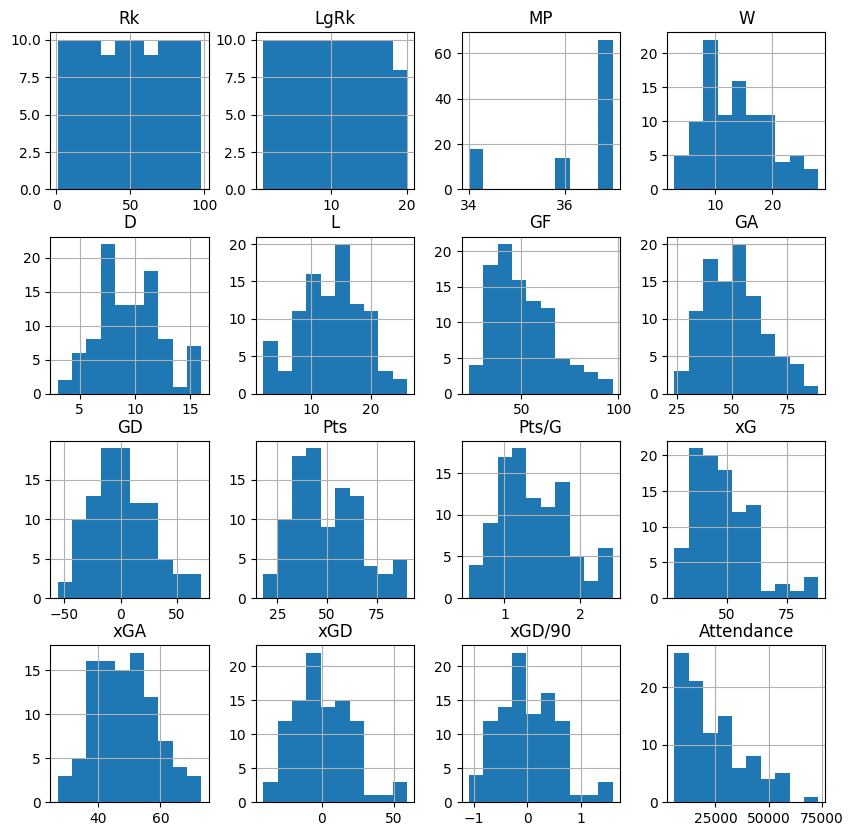

In [10]:
# Comprender dónde se alinean la mayoría de los valores:
df_uefa.hist(figsize= (10,10))

Mirando los histogramas, vemos claramente que la mayoria de ellos exhibe una distribución normal estándar. 'MP' es el atributo que esta más apagado.

C:\Users\crap-\AppData\Local\Temp\ipykernel_22736\2074387095.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,1)


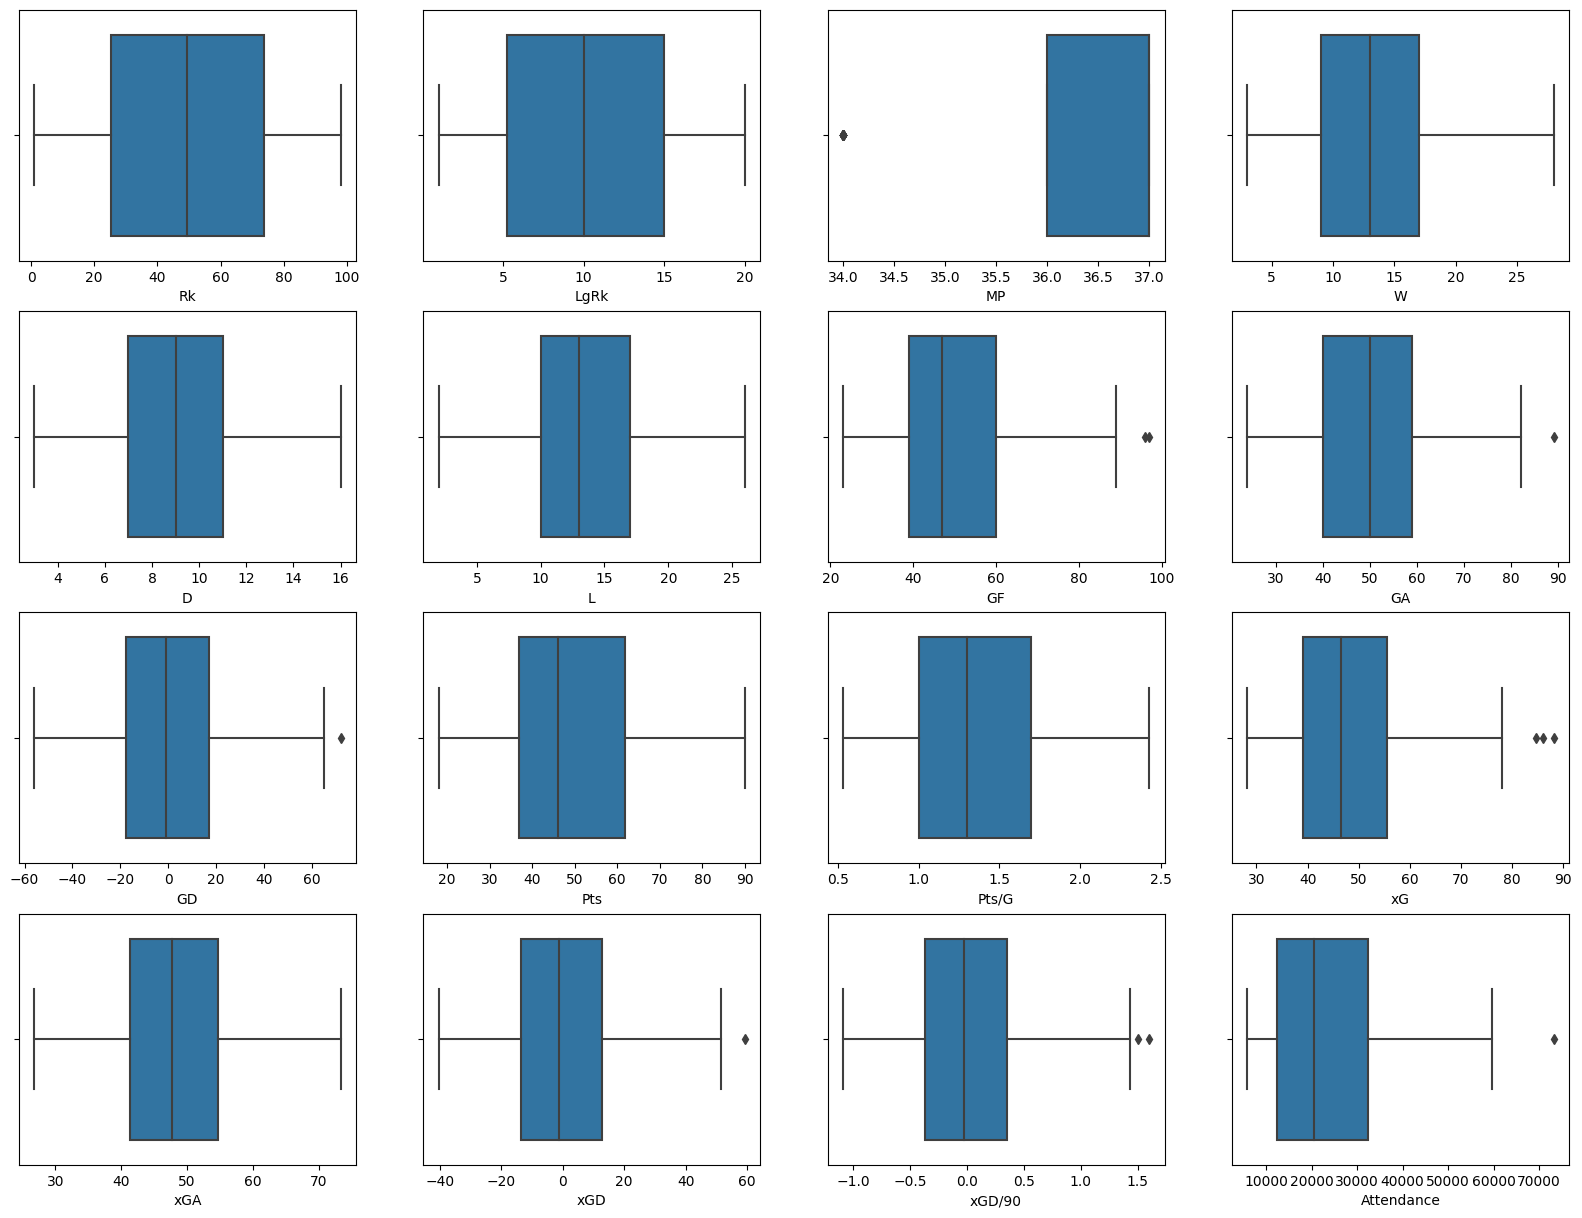

In [11]:
#  Detectando Valores Atipicos de los Atributos Númericos:
plt.subplots(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(x='Rk', data=df_uefa)
plt.subplot(4,4,2)
sns.boxplot(x='LgRk', data=df_uefa)
plt.subplot(4,4,3)
sns.boxplot(x='MP', data=df_uefa)
plt.subplot(4,4,4)
sns.boxplot(x='W', data=df_uefa)
plt.subplot(4,4,5)
sns.boxplot(x='D', data=df_uefa)
plt.subplot(4,4,6)
sns.boxplot(x='L', data=df_uefa)
plt.subplot(4,4,7)
sns.boxplot(x='GF', data=df_uefa)
plt.subplot(4,4,8)
sns.boxplot(x='GA', data=df_uefa)
plt.subplot(4,4,9)
sns.boxplot(x='GD', data=df_uefa)
plt.subplot(4,4,10)
sns.boxplot(x='Pts', data=df_uefa)
plt.subplot(4,4,11)
sns.boxplot(x='Pts/G', data=df_uefa)
plt.subplot(4,4,12)
sns.boxplot(x='xG', data=df_uefa)
plt.subplot(4,4,13)
sns.boxplot(x='xGA', data=df_uefa)
plt.subplot(4,4,14)
sns.boxplot(x='xGD', data=df_uefa)
plt.subplot(4,4,15)
sns.boxplot(x='xGD/90', data=df_uefa)
plt.subplot(4,4,16)
sns.boxplot(x='Attendance', data=df_uefa)
plt.show()

• Observamos que los atributos 'GF', 'GA', 'GD', 'XG', 'XGD', 'XGD/90' Y 'Attendance' presentan valores atípicos, siendo 'XG' el que más tiene.

C:\Users\crap-\AppData\Local\Temp\ipykernel_22736\308098171.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,1)


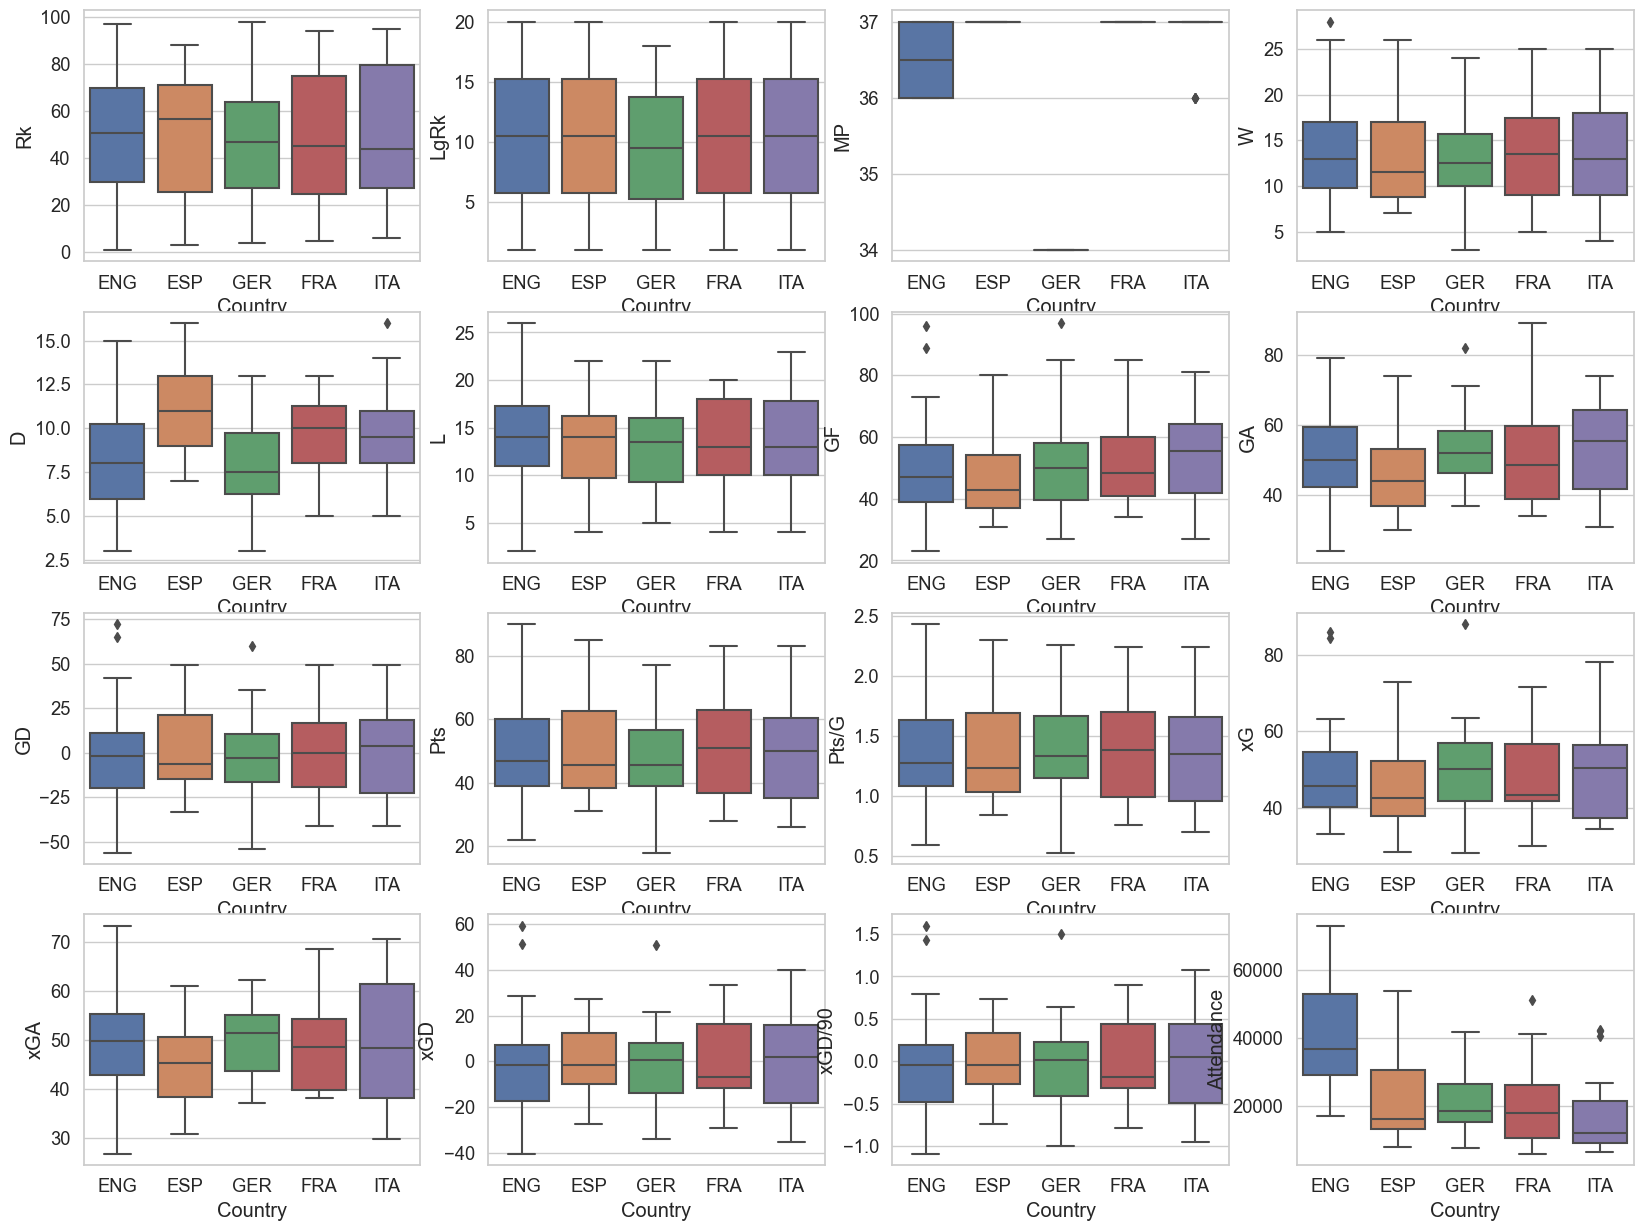

In [12]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(x='Country', y='Rk', data=df_uefa)
plt.subplot(4,4,2)
sns.boxplot(x='Country', y='LgRk', data=df_uefa)
plt.subplot(4,4,3)
sns.boxplot(x='Country', y='MP', data=df_uefa)
plt.subplot(4,4,4)
sns.boxplot(x='Country', y='W', data=df_uefa)
plt.subplot(4,4,5)
sns.boxplot(x='Country', y='D', data=df_uefa)
plt.subplot(4,4,6)
sns.boxplot(x='Country', y='L', data=df_uefa)
plt.subplot(4,4,7)
sns.boxplot(x='Country', y='GF', data=df_uefa)
plt.subplot(4,4,8)
sns.boxplot(x='Country', y='GA', data=df_uefa)
plt.subplot(4,4,9)
sns.boxplot(x='Country', y='GD', data=df_uefa)
plt.subplot(4,4,10)
sns.boxplot(x='Country', y='Pts', data=df_uefa)
plt.subplot(4,4,11)
sns.boxplot(x='Country', y='Pts/G', data=df_uefa)
plt.subplot(4,4,12)
sns.boxplot(x='Country', y='xG', data=df_uefa)
plt.subplot(4,4,13)
sns.boxplot(x='Country', y='xGA', data=df_uefa)
plt.subplot(4,4,14)
sns.boxplot(x='Country', y='xGD', data=df_uefa)
plt.subplot(4,4,15)
sns.boxplot(x='Country', y='xGD/90', data=df_uefa)
plt.subplot(4,4,16)
sns.boxplot(x='Country', y='Attendance', data=df_uefa)
plt.show()

El diagrama de caja muestra que el 'RK' es similar para todos los paises. Aunque, Inglaterra y Alemania tienen la clasificación más alta, mientras que en la ronda final alcanzada Alemania obtuvo menos puntos. El atributo 'w'  tiene un rango similar para todos los paises. El 'MP' NO proporciona mucha información, pero es más alto en los contenedores es Inglaterra. El 'GF' los tiene Alemania y Francia y los 'Pts' inglaterra es el que tiene más puntos.

C:\Users\crap-\AppData\Local\Temp\ipykernel_22736\1951603917.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_uefa.corr(),cmap='YlGnBu',annot=True, linewidth=.5)


<AxesSubplot: >

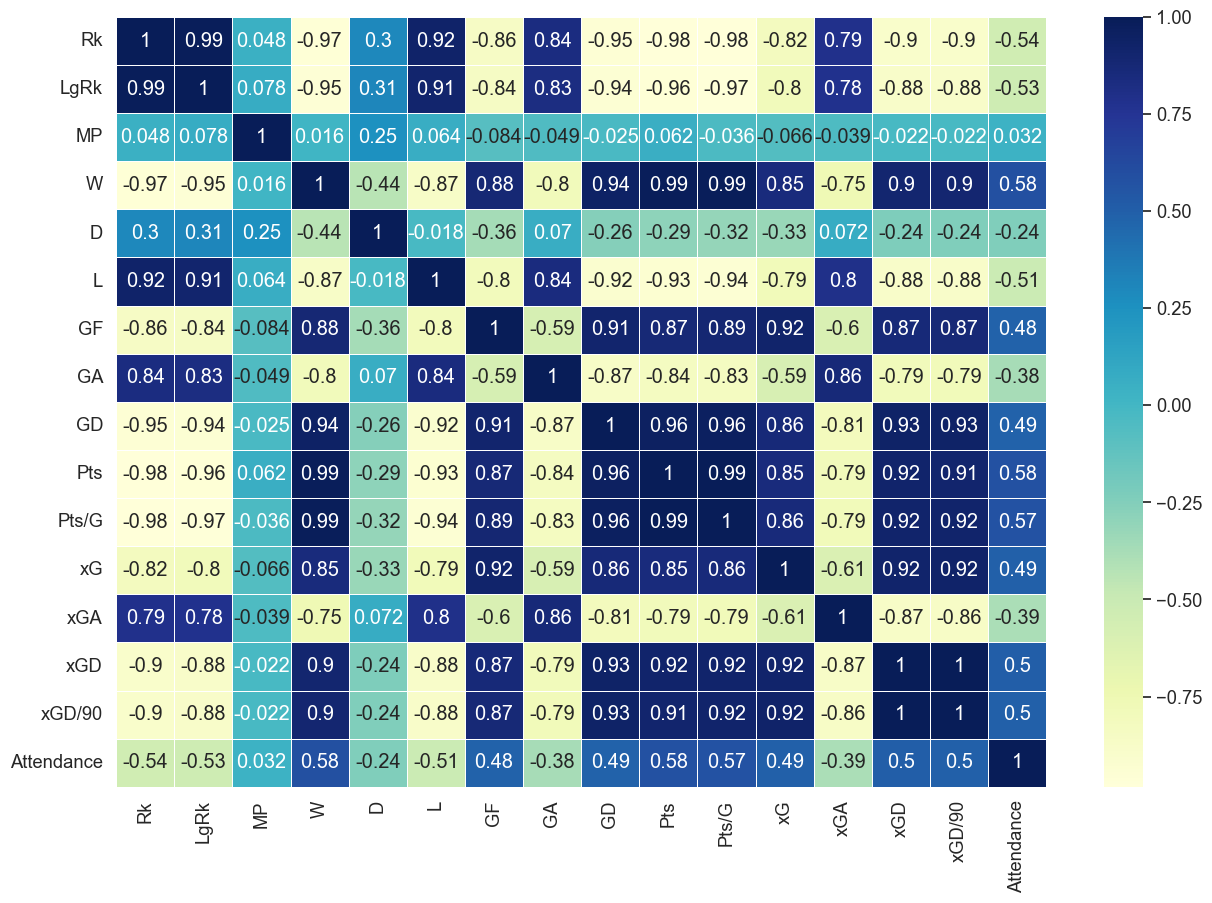

In [13]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_uefa.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

•Como se ve en el gráfico, LgRK, L,GA y xGA  tienen una alta correlación positiva con RK.                                                             
• L, GA Y xGA  tienen una alta correlación positiva con lgRK                                                                                          
• GF, GD, Pts, xG, xGD y xGD/90 tienen una alta correlación positiva con W.                                                                           
• GA y xGA  tienen una alta correlación positiva con L.                                                                                               
• GD, Pts, Pts/G, xG, xGD y xGD/90 tienen una alta correlación positiva con GF.                                                                       
• xGA tienen una alta correlación positiva con GA.                                                                                                    
• Pts, Pts/G, xG, xGD, xGD/90 tienen una alta correlación positiva con GD.                                                                            
• Pts/G, xG, xGD Y xGD/90 tienen una alta correlación positiva con Pts.                                                                               
• xG, xGD y xGD/90 tienen una alta correlación positiva con Pts/G.                                                                                    

In [14]:
# función se encarga de los valores perdidos:
# sustituir los valores que faltan en las columnas numéricas por el valor medio de la columna.
def fill_missing_values(df_uefa):
   for col in df_uefa.select_dtypes(include= ["int","float"]).columns:
      val = df_uefa[col].mean()
      df_uefa[col].fillna(val, inplace=True)
   return df_uefa

In [15]:
# función nos ayudará a eliminar los valores duplicados:
def drop_duplicates(df_uefa, column_name):
   df_uefa = df_uefa.drop_duplicates(subset=column_name)
   return df_uefa

In [16]:
# Para eliminar los valores atípicos:
# Toma un marco de datos y una lista de columnas
# Para cada columna de la lista, calcula la media y la desviación estándar
# Calcula un límite inferior y superior utilizando la media y la desviación estándar
#Elimina los valores que están fuera del rango definido por el límite inferior y superior

def remove_outliers(df_uefa, column_list):
   for col in column_list:
      avg = df_uefa[col].mean()
      std = df_uefa[col].std()
      low = avg - 2 * std
      high = avg + 2 * std
      df_uefa = df_uefa[df_uefa[col].between(low, high, inclusive=True)]
   return df_uefa

In [17]:
my_df = df_uefa.copy()
df_processed = (my_df.
                pipe(fill_missing_values).
                pipe(drop_duplicates, "Squad").
                pipe(remove_outliers, ['GF', 'GA', 'GD', 'xG', 'xGD', 'xGD/90', 'Attendance']))

C:\Users\crap-\AppData\Local\Temp\ipykernel_22736\1893289610.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_uefa = df_uefa[df_uefa[col].between(low, high, inclusive=True)]


In [18]:
# Datos originales:
my_df.shape

(98, 21)

In [19]:
# Datos Procesados:
df_processed.shape

(80, 21)

Se han eliminado 18 filas con registros duplicados y valores atipicos.

In [20]:
# Tomamos el atributo de número de goles a favor, nuestra muestra será el número de goles a favor del conjunto de equipos de Italia:

data = df_processed[df_processed.Country=='ITA']['GF']
data

5     66
7     71
11    55
21    72
28    56
29    56
31    65
40    62
42    46
44    64
60    57
63    43
71    49
77    41
84    42
89    33
91    34
92    27
Name: GF, dtype: int64

# Estudiamos la distribución de la muestra:

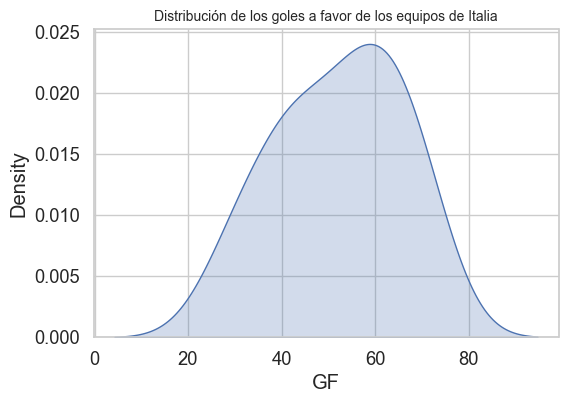

In [21]:
plt.figure(figsize= (6,4))
sns.kdeplot(df_processed[df_processed.Country=='ITA']['GF'], fill=True)
plt.title('Distribución de los goles a favor de los equipos de Italia', fontsize = 10);

# Planteamos la hipótesis de que la distibución de los goles de los equipos de Italia tiene una distribución normal:

• Hipótesis nula H0, nuestra muestra tiene una distribución normal.                                                                                   
• Hipótesis H1, nuestra muestra no tiene una distribución normal.                                                                                     
• Para validar nuestra hipótesis utilizamos el Test de distribución gaussiana Shapiro-Wilk con un alpha del 5%.

In [22]:
# Hacemos una función con el test para usarlo más adelante en otros ejercicios:

def distribucion_normal(data):
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probablemente Gaussiana')
    else:
        print('Probablemente no Gaussiana')

In [23]:
distribucion_normal(df_processed[df_processed.Country=='ITA']['GF'])

stat=0.958, p=0.563
Probablemente Gaussiana


Nuestro p-value está por encima del 5%, no rechazamos la hipótesis nula y podemos decir que tenemos un grado de confianza del 95% de que la muestra tiene una distribución normal.

# En una segunda hipótesis con este atributo planteamos que la media de goles a favor de Italia es la media del resto de equipos:

• Hipótesis nula H0, la media de goles a favor de Italia es la media del resto de equipos.                                                            
• Hipótesis H1, la media de goles a favor de Italia no es la media del resto de equipos.                                                              
• Para validar esta hipótesis usamos el Test ttest_1samp con un alpha del 5%.

In [24]:
# Calculamos la media de goles a favor del resto de equipos
df_processed[df_processed['Country']!='ITA']['GF'].mean().round(2)

46.87

In [25]:
stats.ttest_1samp(a=(df_processed[df_processed['Country'] == 'ITA']['GF']), popmean=(df_processed['GF'].mean().round(2)))

Ttest_1sampResult(statistic=1.2918000951590252, pvalue=0.21371334409867956)

Nuestro p-value está por debajo del 5%, rechazamos la hipótesis nula y podemos decir  de que la media de los goles de los equipos de Italia no es la media del resto de equipos.

# Ejercicio 2:

Con el mismo dataset selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.

Tomamos el atributo de la asistencia, las muestras serán la asistencia del conjunto de equipos de Inglaterra y de Alemania.

In [26]:
# Asistencia de los equipos de Inglaterra:

dataAsENG = df_processed[df_processed['Country'] =='ENG']['Attendance']
dataAsENG

10    36991
41    30777
46    32521
48    30931
51    24541
55    16916
58    41748
61    51443
67    30053
74    38446
82    36308
83    19163
95    20614
Name: Attendance, dtype: int64

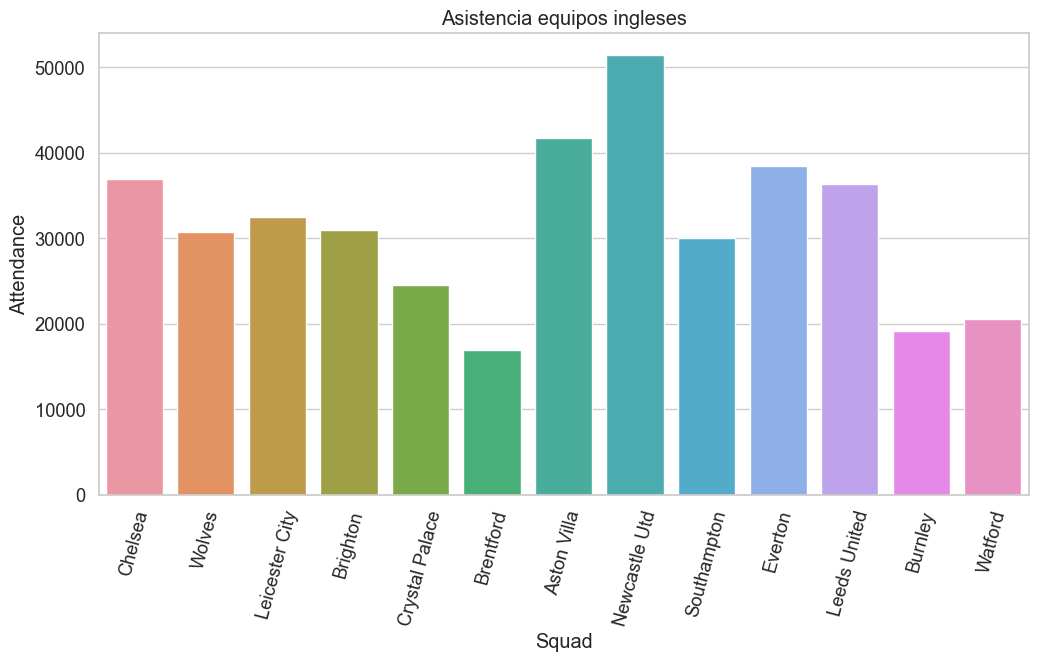

In [27]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Asistencia equipos ingleses')
sns.barplot(x=df_processed['Squad'][dataAsENG.index], y=dataAsENG);

In [28]:
# Asistencia de los equipos de Alemania:
dataAsGER = df_processed[df_processed['Country'] =='GER']['Attendance']
dataAsGER

12    17356
22    22124
25    14046
30    18741
34    31965
43    17978
45    11227
47    26539
54    26162
56    12018
57    15125
65    15197
76    27052
80    23500
Name: Attendance, dtype: int64

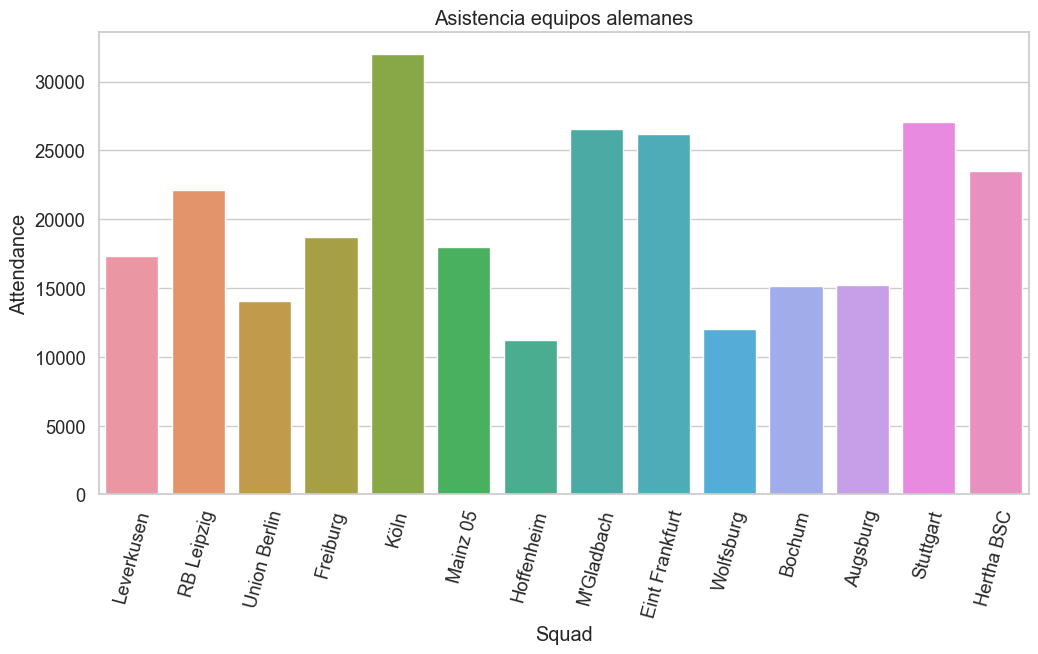

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Asistencia equipos alemanes')
sns.barplot(x=df_processed['Squad'][dataAsGER.index], y=dataAsGER);

# Planteamos la hipótesis de que la varianza de la asistencia a los partidos de los equipos Ingleses es igual a la varianza de la asistencia a los partidos de los equipos alemanes:

• Hipótesis nula 𝐻0: la varianza de las muestras es igual                                                                                            
• Hipótesis 𝐻1: la varianza de las muestras es diferente                                                                                             
• Para validar nuestra hipótesis utilizamos el Test de Leneve y un alpha del 5%.                                                                      
• Para aplicar este test necesitamos que las muestras estén normalmente distribuidas.                                                                 

In [30]:
# comprobamos si la muestra está normalmente distribuida:
dataENGAtt = df_processed[df_processed.Country=='ENG']['Attendance']
distribucion_normal(dataENGAtt)

stat=0.968, p=0.868
Probablemente Gaussiana


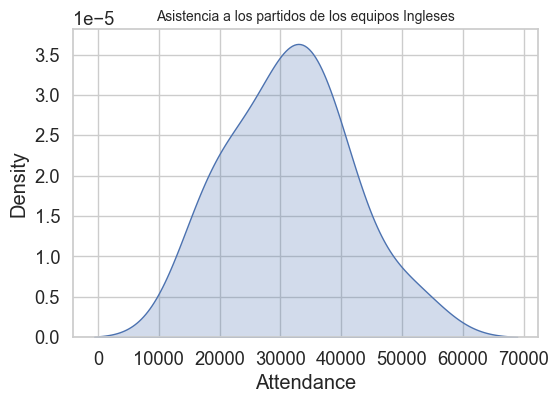

In [31]:
plt.figure(figsize= (6,4))
sns.kdeplot(dataENGAtt, fill=True)
plt.title('Asistencia a los partidos de los equipos Ingleses', fontsize = 10);

# Asistencia a los partidos de los equipos alemanes:

In [32]:
# comprobamos si la muestra está normalmente distribuida:  
dataGERAtt = df_processed[df_processed.Country=='GER']['Attendance']
distribucion_normal(dataGERAtt)

stat=0.948, p=0.537
Probablemente Gaussiana


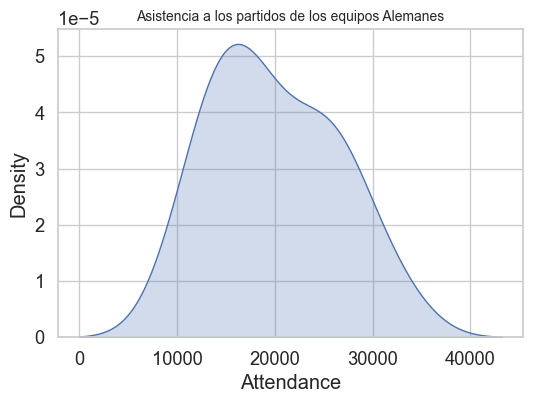

In [33]:
plt.figure(figsize= (6,4))
sns.kdeplot(dataGERAtt, fill=True)
plt.title('Asistencia a los partidos de los equipos Alemanes', fontsize = 10);

In [34]:
# Aplicamos el Test de Leneve con un alpha del 5%:

test_stat_var, p_value_var= stats.levene(dataENGAtt,dataGERAtt)
print("p value:%.4f" % p_value_var)
if p_value_var <0.05:
    print("Las varianzas de las muestras son diferentes.")
else:
    print("Las varianzas de las muestras son iguales.")

p value:0.2824
Las varianzas de las muestras son iguales.


Nuestro p-value está por encima del 5%, no rechazamos la hipótesis nula de que la muestra tiene una distribución normal.

# Ejercicio 3:

Continúa con el conjunto de datos adjunto y selecciona tres atributos del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

# Analizamos si la asistencia de público influye en el total de goles marcados por los equipos.

In [35]:
# ordenamos el dataset por asistencia:
by_attendance = df_processed.sort_values('Attendance', ascending=False)
by_attendance

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
61,62,Newcastle Utd,ENG,14,36,11,10,15,40,61,...,43,1.19,36.5,53.5,-16.9,-0.47,W W W L L,51443,Callum Wilson - 6,Martin Dúbravka
15,16,Marseille,FRA,3,37,20,8,9,59,38,...,68,1.84,56.6,39.2,17.4,0.47,W W L W L,51082,Dimitri Payet - 12,Pau López
16,17,Atlético Madrid,ESP,3,37,20,8,9,63,42,...,68,1.84,51.0,30.9,20.1,0.56,D L W W D,48039,Ángel Correa Luis Suárez - 11,Jan Oblak
5,6,Milan,ITA,1,37,25,8,4,66,31,...,83,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
20,21,Betis,ESP,5,37,19,7,11,62,40,...,64,1.73,54.0,42.9,11.1,0.30,L D L W W,41749,Juanmi - 16,Rui Silva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,45,Sassuolo,ITA,11,37,13,11,13,64,63,...,50,1.35,55.6,63.9,-8.3,-0.22,L L L D W,7638,Gianluca Scamacca - 16,Andrea Consigli
70,71,Angers,FRA,14,37,9,11,17,42,55,...,38,1.03,42.6,47.7,-5.0,-0.14,L D L W L,7370,Sofiane Boufal - 8,Danijel Petkovi?
77,78,Spezia,ITA,15,37,10,6,21,41,68,...,36,0.97,37.3,66.6,-29.3,-0.79,L L L L W,6380,Daniele Verde - 8,Ivan Provedel
71,72,Empoli,ITA,14,37,9,11,17,49,70,...,38,1.03,46.2,64.1,-17.9,-0.48,L W L L D,6320,Andrea Pinamonti - 13,Guglielmo Vicario


In [36]:
# rango de la asistencia
print('Asistencia mínima: ', by_attendance['Attendance'].min(), ' aficcionados. Asistencia máxima: ', by_attendance['Attendance'].max(),'aficcionados')

Asistencia mínima:  5870  aficcionados. Asistencia máxima:  51443 aficcionados


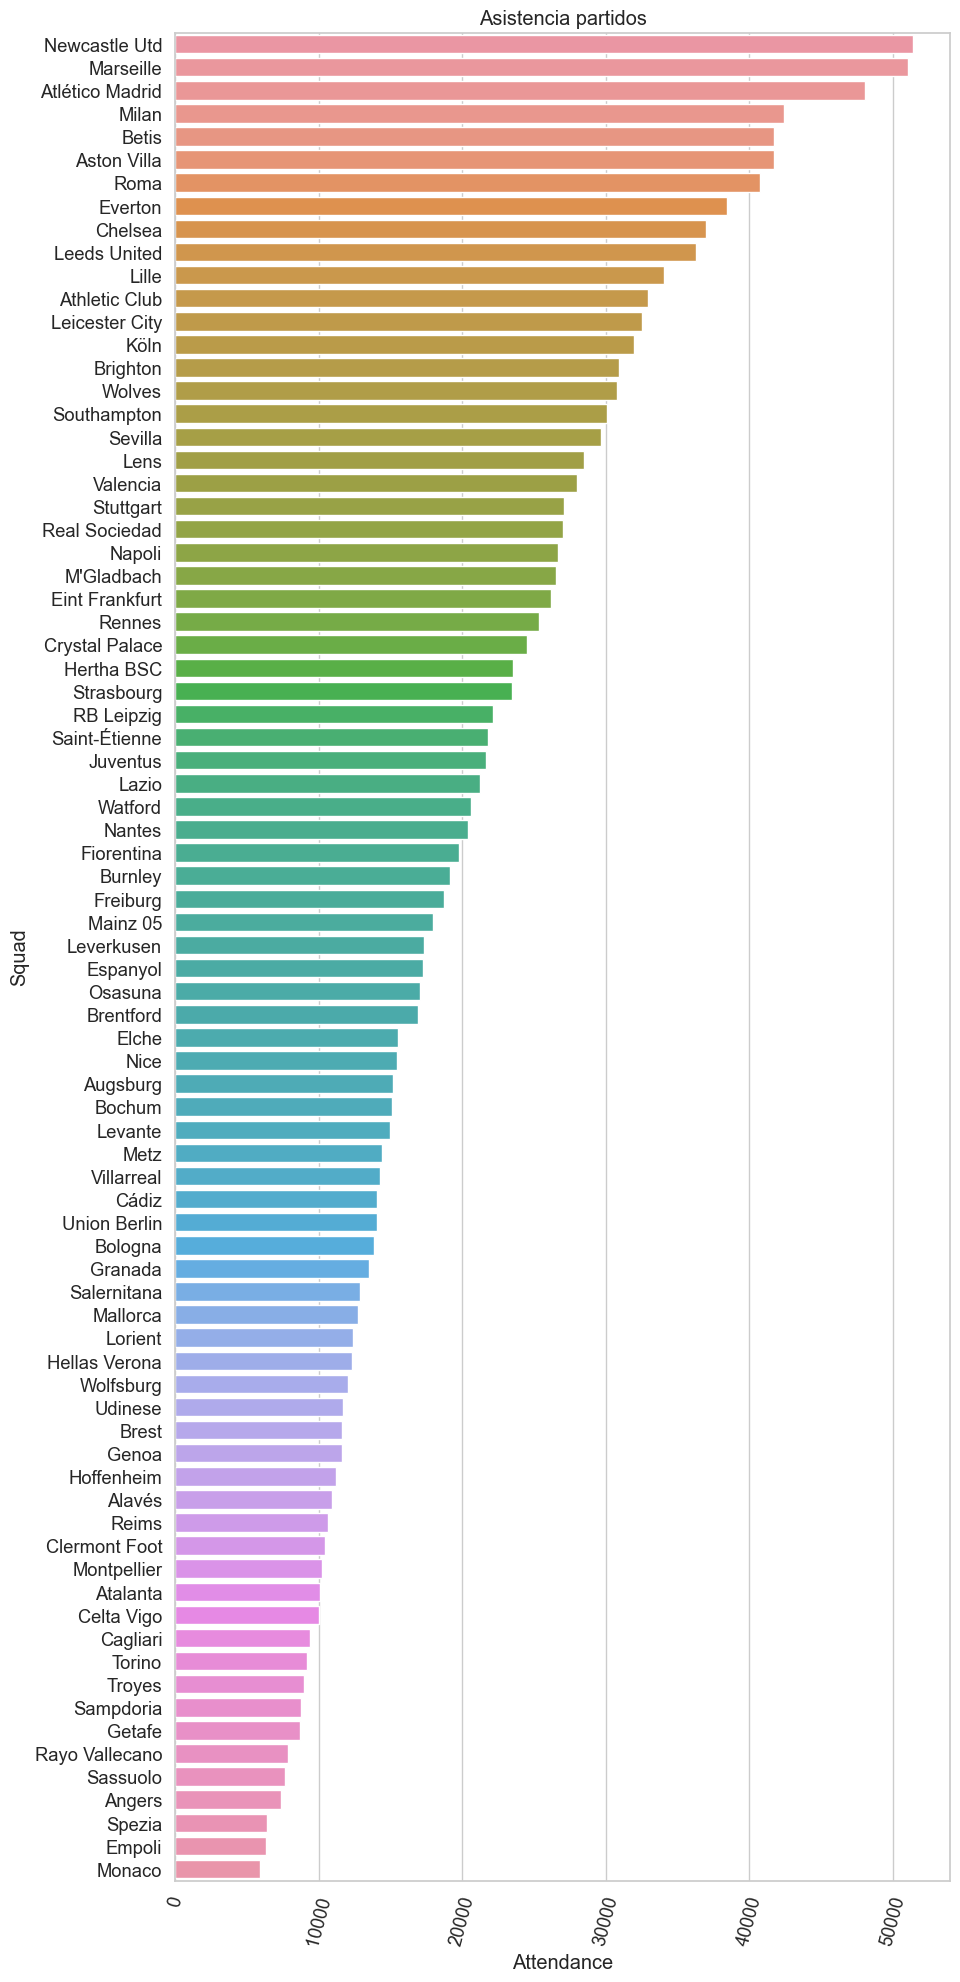

In [37]:
# distribución de la asistencia por equipo
plt.figure(figsize=(10,24))
plt.xticks(rotation=75)
plt.title('Asistencia partidos')
sns.barplot(x=by_attendance['Attendance'], y=by_attendance['Squad']);

In [38]:
# Dividimos el dataset en tres grupos de asistencia y vemos si están equilibrados:
asistencia_baja = by_attendance.loc[by_attendance['Attendance']<=15000]
asistencia_media = by_attendance.loc[(by_attendance['Attendance']>15000) & (by_attendance['Attendance']<=30000)]
asistencia_alta = by_attendance.loc[by_attendance['Attendance']>30000]

In [39]:
print(asistencia_baja.shape)
print(asistencia_media.shape)
print(asistencia_alta.shape)

(33, 21)
(30, 21)
(17, 21)


De cada grupo de asistencia elegimos una muestra. Nuestra muestra será el país que más equipos ha tenido jugando en ese grupo.

El siguiente paso es elegir el equipo de cada muestra y comprobar si las muestras están normalizadas:

In [40]:
# Muestra del grupo Asistencia baja:
asistencia_baja.groupby(['Country'])['Squad'].count()

Country
ESP     9
FRA     9
GER     3
ITA    12
Name: Squad, dtype: int64

In [41]:
# Tomamos los goles de los equipos italianos:
distribucion_normal(asistencia_baja[asistencia_baja.Country=='ITA']['GF'])

stat=0.940, p=0.497
Probablemente Gaussiana


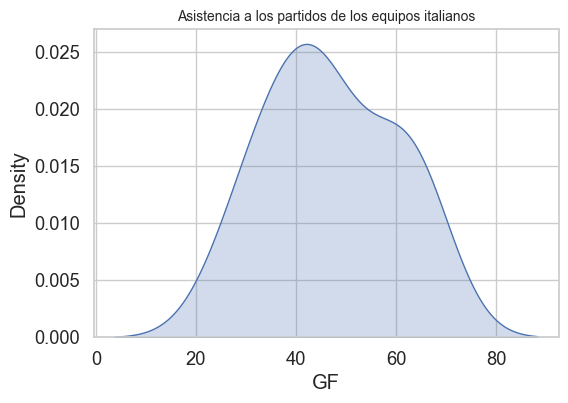

In [42]:
plt.figure(figsize= (6,4))
sns.kdeplot(asistencia_baja[asistencia_baja.Country=='ITA']['GF'], fill=True)
plt.title('Asistencia a los partidos de los equipos italianos', fontsize = 10);

In [43]:
# Muestra del grupo Asistencia media:
asistencia_media.groupby(['Country'])['Squad'].count()

Country
ENG     4
ESP     6
FRA     6
GER    10
ITA     4
Name: Squad, dtype: int64

In [44]:
# Tomamos los goles de los equipos alemanes:
distribucion_normal(asistencia_media[asistencia_media.Country=='GER']['GF'])

stat=0.877, p=0.121
Probablemente Gaussiana


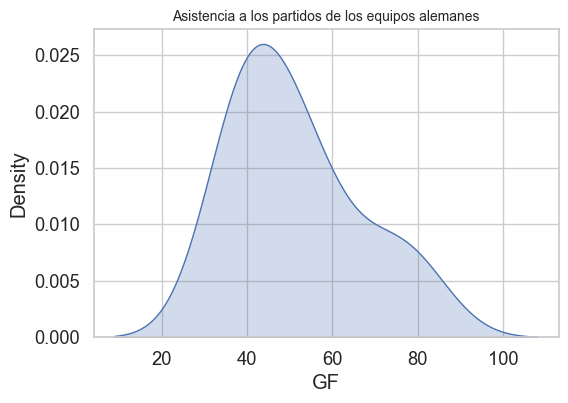

In [45]:
plt.figure(figsize= (6,4))
sns.kdeplot(asistencia_media[asistencia_media.Country=='GER']['GF'], fill=True)
plt.title('Asistencia a los partidos de los equipos alemanes', fontsize = 10);

In [46]:
# Muestra del grupo Asistencia alta:
asistencia_alta.groupby(['Country'])['Squad'].count()

Country
ENG    9
ESP    3
FRA    2
GER    1
ITA    2
Name: Squad, dtype: int64

In [47]:
# Tomamos los goles de los equipos ingleses:
distribucion_normal(asistencia_alta[asistencia_alta.Country=='ENG']['GF'])

stat=0.746, p=0.005
Probablemente no Gaussiana


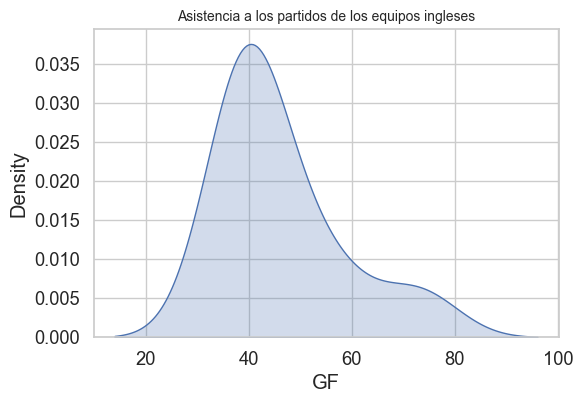

In [48]:
plt.figure(figsize= (6,4))
sns.kdeplot(asistencia_alta[asistencia_alta.Country=='ENG']['GF'], fill=True)
plt.title('Asistencia a los partidos de los equipos ingleses', fontsize = 10);

In [49]:
# Una vez comprobadas las muestras las separamos en variables:
As_alta_ENG_GF = asistencia_alta[asistencia_alta.Country=='ENG']['GF']
As_media_GER_GF = asistencia_media[asistencia_media.Country=='GER']['GF']  
As_baja_ITA_GF = asistencia_baja[asistencia_baja.Country=='ITA']['GF']

# Planteamos la hipótesis de que la distribución del total de goles de los equipos seleccionados de un país dentro de los grupos de asistencia alta, asistencia media y asistencia baja es la misma:

• Hipótesis nula 𝐻0: la distribución de las muestras es igual.                                                                                       
• Hipótesis 𝐻1: la distribución de las muestras es diferente.                                                                                        
• Al no estar normalizada la muestra tomada del grupo Asistencia Alta no podemos usar el Test ANOVA, usaremos el Test Kruskal-Wallis.

In [50]:
# Las muestras necesitan tener la misma varianza para aplicar este test, lo comprobamos con el Test Levene:
test_stat_var, p_value_var= stats.levene(As_alta_ENG_GF,As_media_GER_GF,As_baja_ITA_GF)
print("p value:%.3f" % p_value_var)
if p_value_var <0.05:
    print("Las varianzas de las muestras son diferentes")
else:
    print("Las varianzas de las muestras son iguales")

p value:0.609
Las varianzas de las muestras son iguales


# Test Kruskal-Wallis:

In [51]:
from scipy.stats import kruskal
stat, p = kruskal(As_alta_ENG_GF,As_media_GER_GF,As_baja_ITA_GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Las muestras probablemente presentan la misma distribución')
else:
    print('Las muestras probablemente no presentan la misma distribución')

stat=0.697, p=0.706
Las muestras probablemente presentan la misma distribución


Nuestro p-value está por debajo del 5%, aceptamos la hipótesis nula, podemos decir con un 95% de seguridad que las distribuciones de las muestras son iguales.

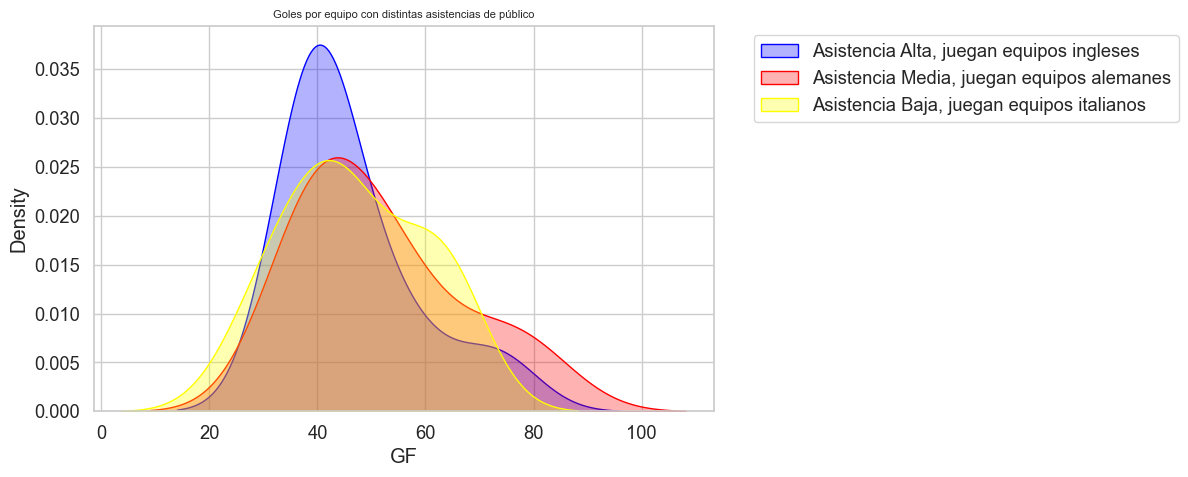

In [52]:
# Gráfica de las distribuciones
plt.figure(figsize= (8,5))

sns.kdeplot(As_alta_ENG_GF,  label= 'Asistencia Alta, juegan equipos ingleses', color= 'blue',
            fill = True, alpha= 0.30)
sns.kdeplot(As_media_GER_GF, label= 'Asistencia Media, juegan equipos alemanes', 
                                     color= 'red', fill = True, alpha = 0.30)
sns.kdeplot(As_baja_ITA_GF, label= 'Asistencia Baja, juegan equipos italianos', 
            fill = True, alpha= 0.30, color='yellow')
plt.title('Goles por equipo con distintas asistencias de público', fontsize = 8)

plt.legend( bbox_to_anchor=(1.05, 1.0), loc='upper left');

Hacemos el mismo análisis pero sin filtrar los equipos por países.

# Planteamos la hipótesis de que la distribución del total de goles de todos equipos seleccionados dentro de los grupos de asistencia alta, asistencia media y asistencia baja es la misma:

• Hipótesis nula 𝐻0: la distribución de las muestras es igual.                                                                                       
• Hipótesis 𝐻1: la distribución de las muestras es diferente.

In [53]:
# Definimos nuestras muestras, con el mismo número de elementos:
As_alta_GF = asistencia_alta['GF'].iloc[0:30]
As_media_GF = asistencia_media['GF'].iloc[0:30]
As_baja_GF = asistencia_baja['GF'].iloc[0:30]

In [54]:
# Test Kruskal-Wallis:
from scipy.stats import kruskal
stat, p = kruskal(As_alta_GF,As_media_GF,As_baja_GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Las muestras probablemente presentan la misma distribución')
else:
    print('Las muestras probablemente no presentan la misma distribución')

stat=5.630, p=0.060
Las muestras probablemente presentan la misma distribución


Nuestro p-value está por encima del 5%, aceptamos la hipótesis nula, la distribución de las muestras es igual.

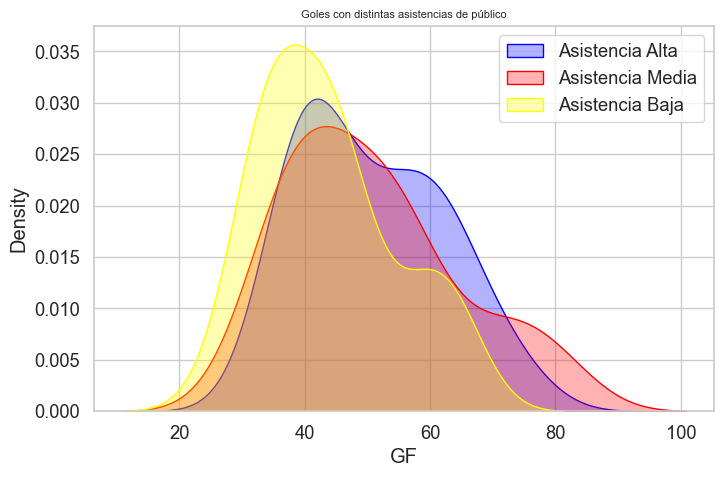

In [55]:
plt.figure(figsize= (8,5))

sns.kdeplot(asistencia_alta['GF'].iloc[0:30],  label= 'Asistencia Alta', color= 'blue',
            fill = True, alpha= 0.30)
sns.kdeplot(asistencia_media['GF'].iloc[0:30], label= 'Asistencia Media', 
                                     color= 'red', fill = True, alpha = 0.30)
sns.kdeplot(asistencia_baja['GF'].iloc[0:30], label= 'Asistencia Baja', 
            fill = True, alpha= 0.30, color='yellow')
plt.title('Goles con distintas asistencias de público', fontsize = 8)
plt.legend();

Observamos que la asistencia sí está relacionada con el total de goles marcados, a menor asistencia también menor número de goles marcados en total por equipo. Podemos pensar que los mejores equipos arrastran más público y también tienen capacidad de hacer más tantos.                              

Por otro otro lado, cuando nos centramos dentro de cada grupo de asistencia en los equipos de un sólo país vemos que el número de goles marcados es muy similar entre países. Pensamos que esto es debido a que las muestras no tienen los mismos elementos, repetimos el test tomando los mismos elementos.

In [56]:
# Redefinimos las muestras para que haya el mismo número de equipos por país en cada grupo de asistencia:
As_alta_ENG_GF = asistencia_alta[asistencia_alta.Country=='ENG']['GF'].iloc[0:11]
As_media_GER_GF = asistencia_media[asistencia_media.Country=='GER']['GF'].iloc[0:11] 
As_baja_ITA_GF = asistencia_baja[asistencia_baja.Country=='ITA']['GF'].iloc[0:11]

In [57]:
# Test Kruskal-Wallis:
from scipy.stats import kruskal
stat, p = kruskal(As_alta_GF,As_media_GF,As_baja_GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Las muestras probablemente presentan la misma distribución')
else:
    print('Las muestras probablemente no presentan la misma distribución')

stat=5.630, p=0.060
Las muestras probablemente presentan la misma distribución


Nuestro p-value está por encima del 5%, aceptamos la hipótesis nula,  la distribución de las muestras es igual.

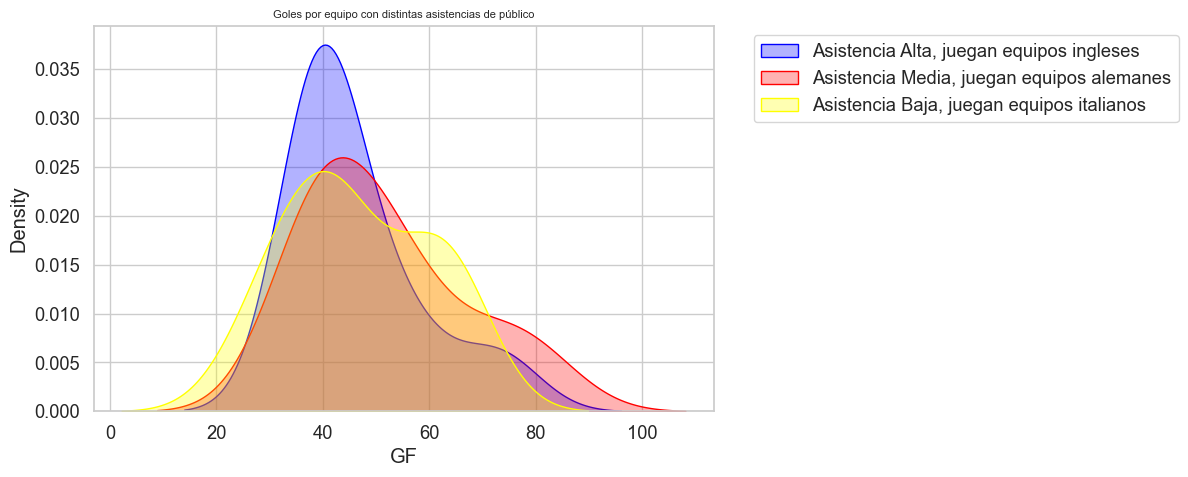

In [58]:
# Confirmamos el resultado del test con una gráfica.
# Gráfica de las distribuciones:
plt.figure(figsize= (8,5))

sns.kdeplot(As_alta_ENG_GF,  label= 'Asistencia Alta, juegan equipos ingleses', color= 'blue',
            fill = True, alpha= 0.30)
sns.kdeplot(As_media_GER_GF, label= 'Asistencia Media, juegan equipos alemanes', 
                                     color= 'red', fill = True, alpha = 0.30)
sns.kdeplot(As_baja_ITA_GF, label= 'Asistencia Baja, juegan equipos italianos', 
            fill = True, alpha= 0.30, color='yellow')
plt.title('Goles por equipo con distintas asistencias de público', fontsize = 8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');